In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
def add_column(gdf, col_name, col_value):
    ones = np.ones(gdf.shape[0])
    column = ones * float(col_value)
    gdf[col_name] = column

In [3]:
def get_shp_files():
    shp_files = []
    thisdir = os.getcwd()
    # r=root, d=directories, f = files
    for r, d, f in os.walk(thisdir):
        for file in f:
            if file.endswith(".shp"):
                shp_files.append(file)
    return sorted(shp_files)

In [4]:
def combine_gdf(files, col_name):
    gdf_list = []
    for f in files:
        file = gpd.read_file(f)
        add_column(file, col_name, f[:4])
        gdf_list.append(file)
    all_gdf = pd.concat(gdf_list)
    return(all_gdf)

In [5]:
shp_files = get_shp_files()

In [6]:
forest_years = combine_gdf(shp_files, 'year')
forest_years.to_file('Allforest.shp')

<Axes: >

<Figure size 1000x500 with 0 Axes>

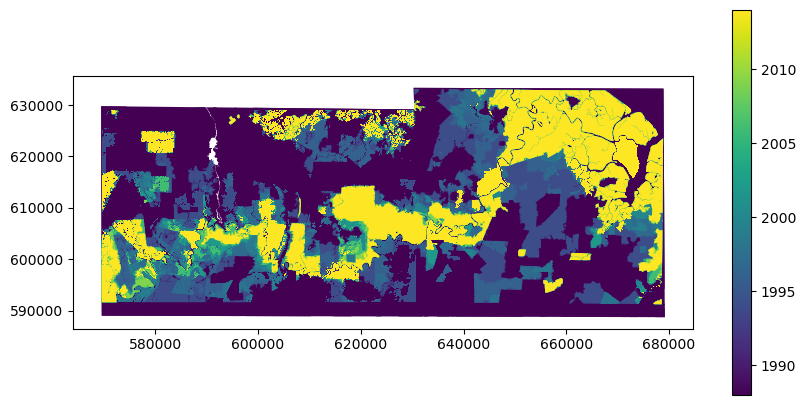

In [7]:
plt.figure()
forest_years.plot('year', legend=True)

Next steps. Add river and sanctuary borders to the plot. Make plot of area through time.
Add these to github and make first page on portfolio.
Consider adding background map
Look into simple fragmentation stats. i.e. sizes of patches and distance between edges and centroids.
landsat figure?

In [8]:
forest_years[forest_years['year']==1994]

,Id,geometry,year,Type,area
0,0,"MULTIPOLYGON (((613245.000 591765.000, 613245....",1994.0,Forest,1194.50
1,0,"MULTIPOLYGON (((674475.000 591945.000, 674445....",1994.0,NaN,1224.93


In [9]:
def sliderplot(x):
    forest_years[forest_years['year']==x].plot(color = 'g')


In [10]:
interact(sliderplot, x=widgets.widgets.SelectionSlider(options=forest_years.year.values))

interactive(children=(SelectionSlider(description='x', options=(1988.0, 1988.0, 1988.0, 1988.0, 1988.0, 1988.0…

<function __main__.sliderplot(x)>